In [1]:
#imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('./TaxiData.csv')

## Q 1.1 Categorizing Columns

<div>
Dataset size: 15002<br>
Number of columns: 18 [12-float64, 4-int64, 2-object]<br>
2 Categorical columns ("payment_type", "company"), and others Numerical Columns.<br>
Dataset contains taxi trip data, including details such as trip distance, duration, fare amount, tip amount, pickup/drop-off locations and timestamps, and possibly payment method<br>
</div>

In [3]:
data.head()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   15000 non-null  float64
 1   fare                    15002 non-null  float64
 2   trip_start_month        15002 non-null  int64  
 3   trip_start_hour         15002 non-null  int64  
 4   trip_start_day          15002 non-null  int64  
 5   trip_start_timestamp    15002 non-null  int64  
 6   pickup_latitude         15000 non-null  float64
 7   pickup_longitude        15000 non-null  float64
 8   dropoff_latitude        14520 non-null  float64
 9   dropoff_longitude       14520 non-null  float64
 10  trip_miles              15002 non-null  float64
 11  pickup_census_tract     1 non-null      float64
 12  dropoff_census_tract    10761 non-null  float64
 13  payment_type            15002 non-null  object 
 14  company                 9862 non-null 

In [5]:
# 2.1: Categorize columns by data type
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['payment_type', 'company'], dtype='object')
Numerical Columns: Index(['pickup_community_area', 'fare', 'trip_start_month', 'trip_start_hour',
       'trip_start_day', 'trip_start_timestamp', 'pickup_latitude',
       'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'trip_seconds', 'dropoff_community_area', 'tips'],
      dtype='object')


## Q 1.2 Type Conversion

```
object-type can be converted to category-type. This is memory efficent and is faster
```

In [9]:

# Convert categorical columns to category type
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Display updated data types
print("Data Types After Conversion:\n", data.dtypes)


Data Types After Conversion:
 pickup_community_area      float64
fare                       float64
trip_start_month             int64
trip_start_hour              int64
trip_start_day               int64
trip_start_timestamp         int64
pickup_latitude            float64
pickup_longitude           float64
dropoff_latitude           float64
dropoff_longitude          float64
trip_miles                 float64
pickup_census_tract        float64
dropoff_census_tract       float64
payment_type              category
company                   category
trip_seconds               float64
dropoff_community_area     float64
tips                       float64
dtype: object


## Q 1.3 Identifing Missing Values

<div>
1. As can be seen from the heatmap, 3 columns (dropoff_lattitude, dropoff_longitude, dropoff_community-area) have around 500 missing values. Since this is only a small portion, these can be filled with values such as mean, median or mode.<br>
2. There are 2 columns (dropoff_census_tract, company) with around 5000 nulls which is around 33%. With a substantial portion of the data missing, simple imputation may lead to bias. So these can be dropped or use predictive imputation depending on whether it is a critical column.<br>
3. We have no data for the column "pickup_census_tract" which has only 1 entry. We need to remove this column as it cannot provide any insights.<br>
4. Although a few columns have missing values, we can gain many insights from this dataset.
</div>

Missing values per column:
 pickup_community_area         2
fare                          0
trip_start_month              0
trip_start_hour               0
trip_start_day                0
trip_start_timestamp          0
pickup_latitude               2
pickup_longitude              2
dropoff_latitude            482
dropoff_longitude           482
trip_miles                    0
pickup_census_tract       15001
dropoff_census_tract       4241
payment_type                  0
company                    5140
trip_seconds                  6
dropoff_community_area      506
tips                          0
dtype: int64


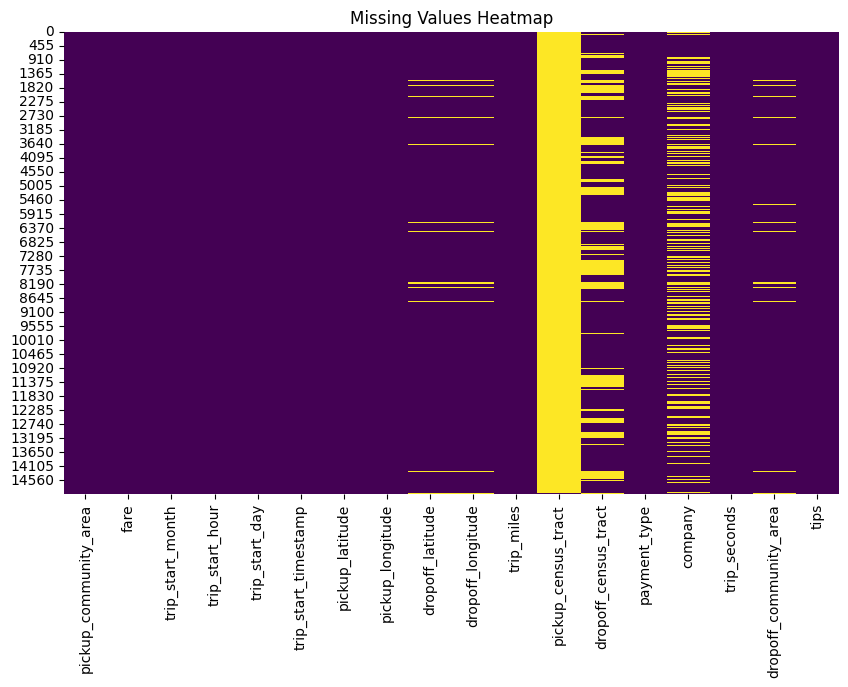

In [7]:

# Step 2.2: Check for missing values
missing_data = data.isnull().sum()
print("Missing values per column:\n", missing_data)

# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


## Q 1.4 Handling Missing Values

<div>
    1. For the 3 columns, "dropoff_lattitude", "dropoff_longitude", "dropoff_community_area", which have around 500 missing values, <b>mean imputation </b> is used.
    <br>
    2. And for columns-"dropoff_census_tract" and "company", with around 5000 nulls, <b>predictive imputation</b> - linear regression is used.
        <br>
    3. The column "pickup_census_tract" which has only 1 entry has been removed.
</div>

In [8]:
# Step 1.4: Handle missing values

# Copy data for processing
processed_data = data.copy()

# Select numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns

# Iterate over numerical columns to handle missing values
for column in numerical_columns:
    if data[column].isnull().sum() > 0:  # Check for missing values
        missing_count = data[column].isnull().sum()
        
        if missing_count < 600:
            # Replace missing values with column mean
            mean_value = data[column].mean()
            processed_data[column] = processed_data[column].fillna(mean_value)
        
        elif 600 <= missing_count <= 6000:
            # Use linear regression to fill missing values
            non_missing_data = data[data[column].notnull()]
            missing_data = data[data[column].isnull()]
            
            # Use other numerical columns as predictors
            X_train = non_missing_data[numerical_columns].drop(columns=[column]).dropna()
            y_train = non_missing_data[column].loc[X_train.index]  # Match indices
            X_test = missing_data[numerical_columns].drop(columns=[column]).dropna()

            if not X_train.empty and not X_test.empty:  # Proceed if data is valid
                model = LinearRegression()
                model.fit(X_train, y_train)
                
                # Predict missing values
                predicted_values = model.predict(X_test)
                processed_data.loc[missing_data.index, column] = predicted_values
        
        elif missing_count > 6000:
            # Drop the column
            processed_data.drop(columns=[column], inplace=True)

# Save the processed data to a new CSV file
output_file_path = './Processed_TaxiData.csv'
processed_data.to_csv(output_file_path, index=False)